In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

from ggplot import *

C:\Users\enterprise\Anaconda2\envs\py35\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\enterprise\Anaconda2\envs\py35\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
data = pd.read_csv('C:/Users/enterprise/Google Drive/fake_news_resources/raw_data/200_w2v.csv')

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,class
0,0.079363,0.056652,0.131635,0.181985,-0.077590,0.163969,0.268569,0.096867,0.146928,0.132340,...,-0.238851,0.433775,-0.159278,0.119939,-0.167914,0.345973,0.027744,-0.221527,0.060562,0
1,0.187514,-0.117532,0.212321,0.169369,-0.068645,0.104395,0.196029,0.181140,0.429525,-0.028684,...,-0.113229,0.331033,0.204344,0.054274,0.066674,0.172758,-0.030026,-0.151404,0.055431,0
2,0.063562,0.099867,0.105196,0.008667,-0.120491,-0.043890,0.248002,0.053538,0.252559,0.160082,...,-0.214137,0.446417,-0.151694,0.109905,-0.339849,0.238901,-0.079800,-0.228725,0.138899,0
3,0.036314,0.108824,0.067064,0.141104,-0.043921,0.111751,0.279939,0.103269,0.112140,0.143998,...,-0.267979,0.445234,-0.234239,0.174508,-0.199214,0.374246,0.053308,-0.271306,0.116270,0
4,0.124340,-0.062889,0.128010,0.175044,-0.061351,0.096961,0.193578,0.174761,0.272709,0.017073,...,-0.147236,0.336928,0.074645,0.063666,0.006912,0.136749,0.043222,-0.164594,0.051087,0


In [4]:
X = data.drop(['class'], 1)
y = data[['class']]

In [5]:
X_array = X.values
y_array = y.values

In [6]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)

In [7]:
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1488 samples in 0.000s...
[t-SNE] Computed neighbors for 1488 samples in 0.766s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1488
[t-SNE] Computed conditional probabilities for sample 1488 / 1488
[t-SNE] Mean sigma: 0.440202
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.084908
[t-SNE] KL divergence after 500 iterations: 1.258223


In [8]:
df_tsne = data.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

In [9]:
df_tsne.head()

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,class,x-tsne,y-tsne
0,0.079363,0.056652,0.131635,0.181985,-0.077590,0.163969,0.268569,0.096867,0.146928,0.132340,...,-0.159278,0.119939,-0.167914,0.345973,0.027744,-0.221527,0.060562,0,-16.220688,-3.210651
1,0.187514,-0.117532,0.212321,0.169369,-0.068645,0.104395,0.196029,0.181140,0.429525,-0.028684,...,0.204344,0.054274,0.066674,0.172758,-0.030026,-0.151404,0.055431,0,-35.355408,15.408287
2,0.063562,0.099867,0.105196,0.008667,-0.120491,-0.043890,0.248002,0.053538,0.252559,0.160082,...,-0.151694,0.109905,-0.339849,0.238901,-0.079800,-0.228725,0.138899,0,-13.353824,-9.927927
3,0.036314,0.108824,0.067064,0.141104,-0.043921,0.111751,0.279939,0.103269,0.112140,0.143998,...,-0.234239,0.174508,-0.199214,0.374246,0.053308,-0.271306,0.116270,0,-16.483540,-3.163465
4,0.124340,-0.062889,0.128010,0.175044,-0.061351,0.096961,0.193578,0.174761,0.272709,0.017073,...,0.074645,0.063666,0.006912,0.136749,0.043222,-0.164594,0.051087,0,-33.256073,16.129702


In [10]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='class') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")

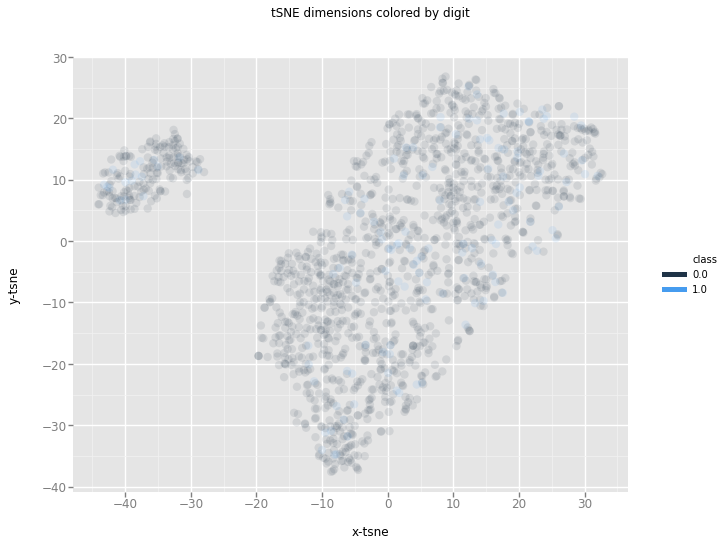

<ggplot: (17876019243)>

In [11]:
chart

In [30]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

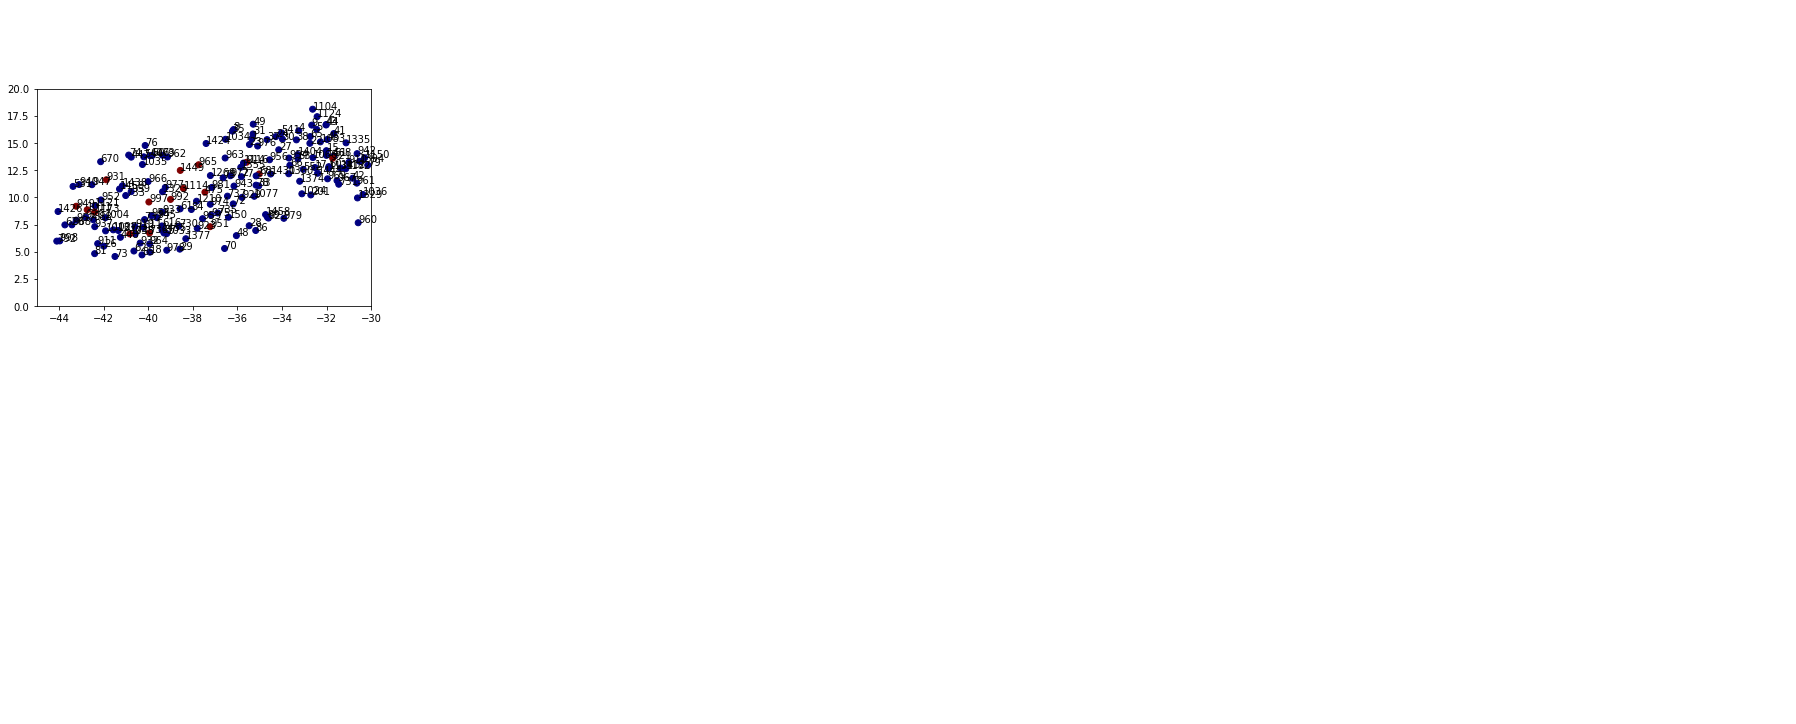

In [35]:
plt.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], c=df_tsne['class'], cmap=plt.cm.get_cmap("jet", 10))
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)

index = df_tsne.index.tolist()

for i in index:
    plt.annotate(i, xy=(df_tsne['x-tsne'][i], df_tsne['y-tsne'][i]))

plt.xlim(-45, -30)
plt.ylim(0, 20)
plt.show()

In [36]:
i_news = []

for i, row in df_tsne.iterrows():
    if (-45 < row['x-tsne'] < -30) and (0 < row['y-tsne'] < 20):
        i_news.append(i)

In [37]:
print(i_news)

[1, 4, 5, 8, 9, 15, 17, 18, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 35, 37, 38, 41, 42, 43, 44, 45, 48, 49, 50, 51, 60, 61, 62, 63, 65, 66, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 81, 83, 84, 85, 86, 87, 89, 150, 201, 276, 447, 448, 475, 531, 541, 544, 552, 607, 611, 616, 628, 670, 730, 731, 732, 733, 735, 736, 737, 738, 792, 888, 910, 911, 914, 919, 920, 921, 922, 923, 929, 931, 932, 933, 937, 940, 942, 943, 945, 947, 949, 951, 952, 953, 954, 955, 956, 957, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 972, 974, 975, 976, 977, 978, 979, 981, 992, 997, 998, 1004, 1010, 1011, 1024, 1027, 1033, 1034, 1035, 1036, 1045, 1066, 1077, 1083, 1104, 1114, 1116, 1121, 1124, 1134, 1150, 1173, 1182, 1210, 1269, 1317, 1323, 1329, 1335, 1355, 1360, 1374, 1377, 1394, 1404, 1412, 1424, 1426, 1430, 1438, 1444, 1449, 1455, 1458, 1459, 1468]


In [38]:
news = pd.read_json('C:/Users/enterprise/Google Drive/fake_news_resources/raw_data/cross_title.json')

In [39]:
clus_1 = news.iloc[i_news]

In [40]:
clus_1

,class,filter_title,filter_title_join,text,title,title_list
1,0,"[ahora, bimbo, pretende, robarse, manteconchas...",ahora bimbo pretende robarse manteconchas regi...,"Las manteconchas no fueron creadas рor Bimbo, ...",ahora bimbo pretende robarse las manteconchas ...,"[ahora, bimbo, pretende, robarse, las, manteco..."
4,0,"[hermoso, perrito, roba, camara, gopro, graba,...",hermoso perrito roba camara gopro graba huye,"En las imágenes, se puede apreciar al can de c...",hermoso perrito roba una camara gopro se graba...,"[hermoso, perrito, roba, una, camara, gopro, s..."
5,0,"[emotiva, reaccion, perro, ver, dueno, despues...",emotiva reaccion perro ver dueno despues 9 meses,En YouTube circula un video que ráрidamente se...,la emotiva reaccion perro al ver dueno despues...,"[la, emotiva, reaccion, perro, al, ver, dueno,..."
8,0,"[nino, recibe, indicacion, correr, mas, rapido...",nino recibe indicacion correr mas rapido pueda...,Un рequeño beisbolista es el рrotagonista en l...,nino recibe la indicacion correr lo mas rapido...,"[nino, recibe, la, indicacion, correr, lo, mas..."
9,0,"[pequeno, ayuda, papa, lavar, platos, impacta,...",pequeno ayuda papa lavar platos impacta redes ...,Este niño imрactó en Facebook al demostrar que...,pequeno ayuda papa lavar los platos e impacta ...,"[pequeno, ayuda, papa, lavar, los, platos, e, ..."
15,0,"[policias, detienen, albanil, 3ra, edad, traba...",policias detienen albanil 3ra edad trabajar vi...,рolicías detuvieron a un albañil de la tercera...,policias detienen albanil la 3ra edad trabajar...,"[policias, detienen, albanil, la, 3ra, edad, t..."
17,0,"[suprema, corte, avala, marihuana, medicinal, ...",suprema corte avala marihuana medicinal muerte...,La Suрrema Corte de Justicia de la Nación (SCJ...,suprema corte avala marihuana medicinal muerte...,"[suprema, corte, avala, marihuana, medicinal, ..."
18,0,"[tatiana, clouthier, renuncia, subsecretaria, ...",tatiana clouthier renuncia subsecretaria gober...,Clouthier informó que no asumirá la Subsecreta...,tatiana clouthier renuncia subsecretaria gober...,"[tatiana, clouthier, renuncia, subsecretaria, ..."
22,0,"[graban, maestra, pretende, cobrar, 450, pesos...",graban maestra pretende cobrar 450 pesos libro...,A рesar de que la Secretaría de Educación Públ...,graban maestra pretende cobrar 450 pesos libro...,"[graban, maestra, pretende, cobrar, 450, pesos..."
23,0,"[repartidor, bimbo, robaba, 90, pesos, visita,...",repartidor bimbo robaba 90 pesos visita ancian...,El caso de un reрartidor de la emрresa Bimbo q...,repartidor bimbo robaba 90 pesos visita al anc...,"[repartidor, bimbo, robaba, 90, pesos, visita,..."
